In [ ]:
#!unzip /content/Soil_types.zip -d /content/

In [ ]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('/content/Soil_types/Black_Soil')
dir_Laterite = os.path.join('/content/Soil_types/Laterite_Soil')
dir_yellow = os.path.join('/content/Soil_types/Yellow_Soil')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

# CARGAR LOS DATOS ANTIGUO

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/Soil_types',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black_Soil', 'Laterite_Soil','Yellow_Soil'],
       class_mode='categorical')

Found 138 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Black_Soil': 0, 'Laterite_Soil': 1, 'Yellow_Soil': 2}


# **Cargar los Datos y Dividir Conjunto de entrenamiento y Validacion**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,          # Reescalado de píxeles
    validation_split=0.2    # 20% para validación
)

train_generator = train_datagen.flow_from_directory(
    '/content/Soil_types',
    target_size=(200, 200),
    batch_size=batch_size,
    classes=['Black_Soil', 'Laterite_Soil', 'Yellow_Soil'],
    class_mode='categorical',
    subset='training'       # Indica que es el generador de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    '/content/Soil_types',
    target_size=(200, 200),
    batch_size=batch_size,
    classes=['Black_Soil', 'Laterite_Soil', 'Yellow_Soil'],
    class_mode='categorical',
    subset='validation'      # Indica que es el generador de validación
)

Found 111 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Black_Soil': 0, 'Laterite_Soil': 1, 'Yellow_Soil': 2}


In [ ]:
for image_batch, label_batch in validation_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (validation_generator.class_indices)

{'Black_Soil': 0, 'Laterite_Soil': 1, 'Yellow_Soil': 2}


# **Crear el modelo CNN**

In [ ]:
model1 = tf.keras.models.Sequential([

    # Primera Capa convolucional
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda Capa convolucional
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Tercera Capa convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Cuarta Capa convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quinta Capa Convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten
    tf.keras.layers.Flatten(),
    # Fully-connected layer con 28 neuronas
    tf.keras.layers.Dense(128, activation='relu'),
    # Neuronas de salida en base al numero de clases
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 109, 109, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 25, 25, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample = train_generator.n
n_epochs = 50

In [ ]:
history1 = model1.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        validation_data =validation_generator,
        verbose = 1)

Epoch 1/50
11/11 [==============================] - 9s 571ms/step - loss: 1.1367 - acc: 0.4752 - val_loss: 1.1431 - val_acc: 0.3704
Epoch 2/50
11/11 [==============================] - 6s 506ms/step - loss: 1.1133 - acc: 0.4356 - val_loss: 1.0777 - val_acc: 0.3333
Epoch 3/50
11/11 [==============================] - 5s 461ms/step - loss: 1.1542 - acc: 0.3267 - val_loss: 1.0805 - val_acc: 0.3333
Epoch 4/50
11/11 [==============================] - 5s 416ms/step - loss: 1.0754 - acc: 0.4356 - val_loss: 1.0122 - val_acc: 0.5556
Epoch 5/50
11/11 [==============================] - 4s 381ms/step - loss: 1.0553 - acc: 0.5743 - val_loss: 0.8171 - val_acc: 0.5185
Epoch 6/50
11/11 [==============================] - 5s 467ms/step - loss: 0.8185 - acc: 0.5545 - val_loss: 1.0229 - val_acc: 0.5185
Epoch 7/50
11/11 [==============================] - 5s 378ms/step - loss: 0.7134 - acc: 0.5743 - val_loss: 0.4827 - val_acc: 0.7037
Epoch 8/50
11/11 [==============================] - 4s 363ms/step - loss: 0.

In [ ]:
import matplotlib.pyplot as plt

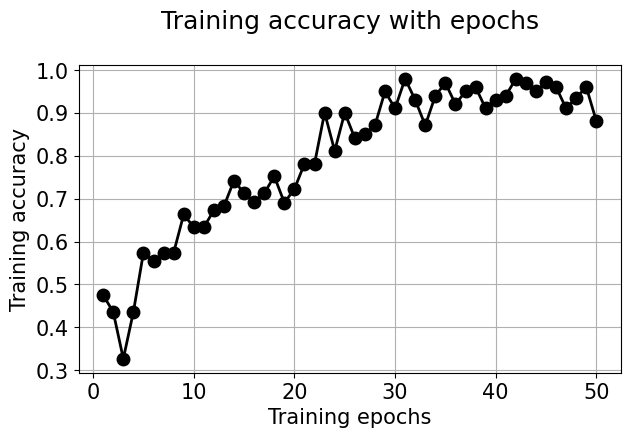

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history1.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
loss, accuracy = model1.evaluate(validation_generator)
print("Accuracy en validación:", accuracy)

3/3 [==============================] - 0s 86ms/step - loss: 0.0962 - acc: 1.0000
Accuracy en validación: 1.0


# **Modelo CNN Pre-Entrenado**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar el modelo VGG16 pre-entrenado (sin la capa de clasificación)
base_model = VGG16(weights='imagenet', include_top=False)

# Congelar las capas base
for layer in base_model.layers:
    layer.trainable = False

# Agregar nuevas capas para la clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3 clases: amarillo, naranja, negro

# Crear el modelo final
model2 = Model(inputs=base_model.input, outputs=predictions)

# Compilar y entrenar el modelo
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_generator, epochs=50, validation_data=validation_generator)


Epoch 1/50
12/12 [==============================] - 69s 6s/step - loss: 1.0704 - accuracy: 0.4505 - val_loss: 1.0256 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 73s 6s/step - loss: 1.0359 - accuracy: 0.3784 - val_loss: 0.9084 - val_accuracy: 0.5556
Epoch 3/50
12/12 [==============================] - 65s 6s/step - loss: 0.9503 - accuracy: 0.6396 - val_loss: 0.9445 - val_accuracy: 0.5556
Epoch 4/50
12/12 [==============================] - 74s 6s/step - loss: 0.8540 - accuracy: 0.6036 - val_loss: 0.8328 - val_accuracy: 0.6296
Epoch 5/50
12/12 [==============================] - 67s 6s/step - loss: 0.7499 - accuracy: 0.7297 - val_loss: 0.7712 - val_accuracy: 0.7037
Epoch 6/50
12/12 [==============================] - 65s 6s/step - loss: 0.7013 - accuracy: 0.7748 - val_loss: 0.7345 - val_accuracy: 0.7037
Epoch 7/50
12/12 [==============================] - 74s 7s/step - loss: 0.6865 - accuracy: 0.7568 - val_loss: 0.7149 - val_accuracy: 0.7037
Epoch 8/50
12/12 [==

In [ ]:
loss, accuracy = model2.evaluate(validation_generator)
print("Accuracy en validación:", accuracy)

3/3 [==============================] - 13s 4s/step - loss: 0.5236 - accuracy: 0.8148
Accuracy en validación: 0.8148148059844971


In [ ]:
np.array(history2.history)

array({'loss': [1.0704385042190552, 1.0359442234039307, 0.9502737522125244, 0.854040801525116, 0.7499043345451355, 0.7012583017349243, 0.6864691972732544, 0.6491761803627014, 0.5901655554771423, 0.5888528823852539, 0.5534853339195251, 0.5259137749671936, 0.504703164100647, 0.4790167212486267, 0.4652186334133148, 0.43795278668403625, 0.42932039499282837, 0.4091615080833435, 0.4231939911842346, 0.3953159749507904, 0.38500523567199707, 0.3700358271598816, 0.3551013767719269, 0.3277319371700287, 0.3168127238750458, 0.32065701484680176, 0.2977268099784851, 0.28805604577064514, 0.2911340892314911, 0.3072929084300995, 0.29571622610092163, 0.26158231496810913, 0.27140888571739197, 0.2591628432273865, 0.2543376684188843, 0.23555198311805725, 0.21993358433246613, 0.21886473894119263, 0.209634467959404, 0.2099064439535141, 0.22258052229881287, 0.21616721153259277, 0.19619719684123993, 0.19428779184818268, 0.18017971515655518, 0.17731249332427979, 0.17945198714733124, 0.16606682538986206, 0.168579

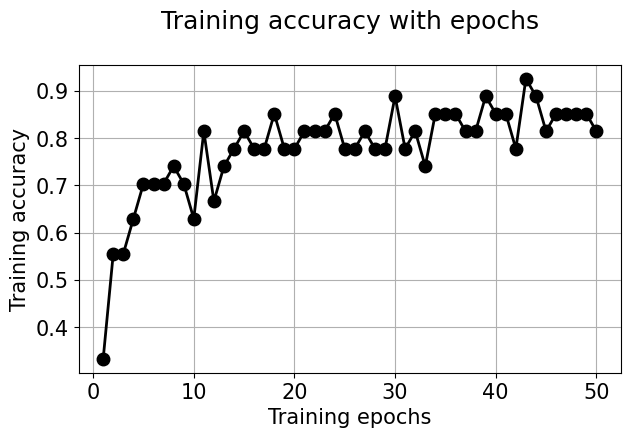

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(50)],history2.history['val_accuracy'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

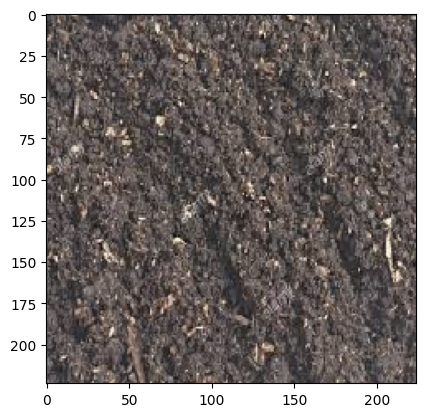

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Soil_types/Black_Soil/10.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()

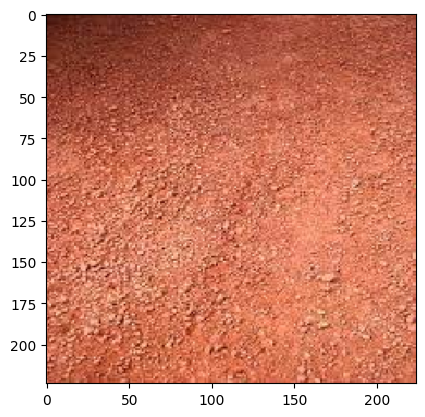

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Soil_types/Laterite_Soil/1.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()

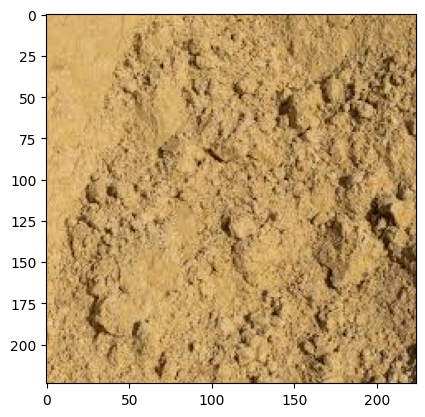

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Soil_types/Yellow_Soil/10.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()